In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings("ignore")

In [2]:
V = -1
N = 2
M = 5

min_J_V_ratio = -2.5
max_J_V_ratio = 2.5
max_mu_value = 2

resolution = 1000

mu_values = np.linspace(0, max_mu_value, resolution)
J_V_ratio_values = np.linspace(min_J_V_ratio, max_J_V_ratio, resolution)

energy_gap_cutoff = 0.1
energy_gap_cutoff_2 = 0.01
energy_gap_cutoff_3 = 0.001

In [3]:
mu_grid, J_V_ratio_grid = np.meshgrid(mu_values, J_V_ratio_values)

energy_grid = np.zeros_like(mu_grid)
energy_gap_grid = np.zeros_like(mu_grid)
energy_gap_mask = np.zeros_like(mu_grid)

for i, mu in enumerate(mu_values):
    for j, J_V_ratio in enumerate(J_V_ratio_values):
        J = J_V_ratio * V
        
        H = construct_initial_hamiltonian(N, M, mu) + construct_hamiltonian(N, M, J, V)
        
        eigenvalues, eigenvectors = exact_diagonalize(H)
        energy_gap = eigenvalues[1]-eigenvalues[0]
        energy_gap_grid[j,i] = energy_gap
        
        if energy_gap < energy_gap_cutoff:
            energy_gap_mask[j,i] = 1
            if energy_gap < energy_gap_cutoff_2:
                energy_gap_mask[j,i] = 2
                if energy_gap < energy_gap_cutoff_3:
                    energy_gap_mask[j,i] = 3
        
        energy_grid[j, i] = eigenvalues[0] 
        energy_gap_grid[j, i] = energy_gap
    
one_over_energy_gap_grid = 1/energy_gap_grid

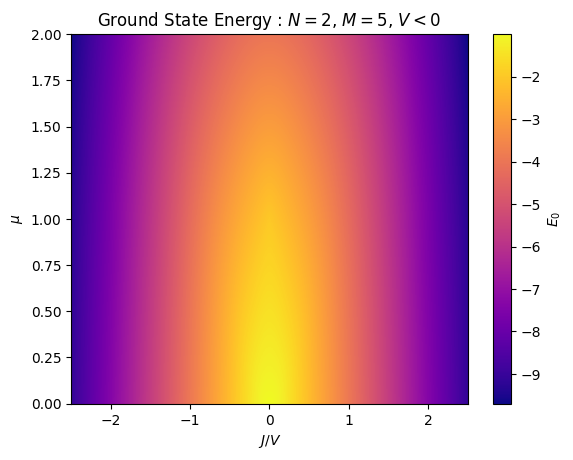

In [4]:
plt.figure()

plt.pcolormesh(J_V_ratio_grid, mu_grid, energy_grid, shading='auto', cmap='plasma')

plt.xlabel("$J/V$")
plt.ylabel("$\mu$")
if V > 0:
    plt.title(f"Ground State Energy : $N=${N}, $M=${M}, $V>0$")
elif V < 0: 
    plt.title(f"Ground State Energy : $N=${N}, $M=${M}, $V<0$")
plt.colorbar(label="$E_0$")

plt.show()

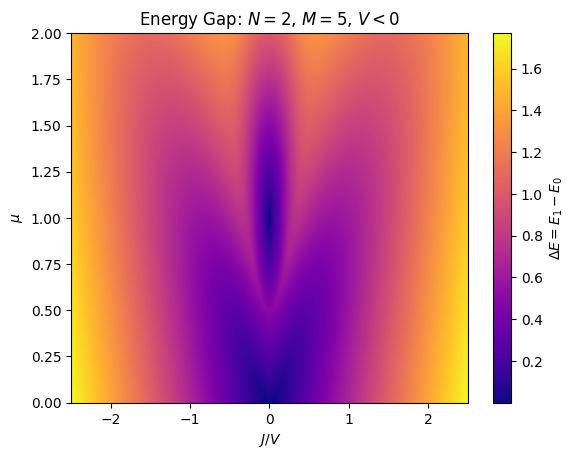

In [5]:
plt.figure()

plt.pcolormesh(J_V_ratio_grid, mu_grid, energy_gap_grid, shading='auto', cmap='plasma')

plt.xlabel("$J/V$")
plt.ylabel("$\mu$")
if V > 0:
    plt.title(f"Energy Gap: $N=${N}, $M=${M}, $V>0$")
elif V < 0: 
    plt.title(f"Energy Gap: $N=${N}, $M=${M}, $V<0$")
plt.colorbar(label="$\Delta E = E_1 - E_0$")

plt.show()

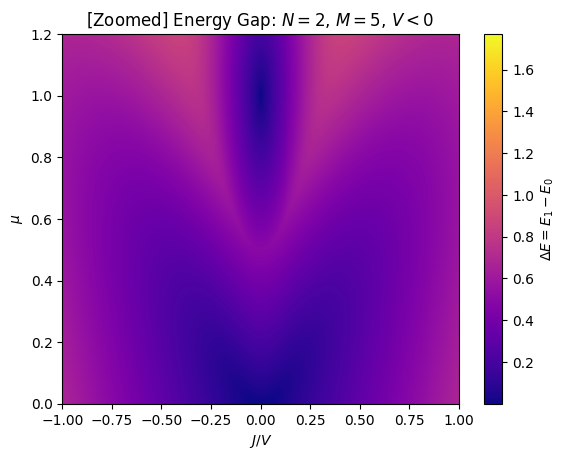

In [6]:
plt.figure()

plt.pcolormesh(J_V_ratio_grid, mu_grid, energy_gap_grid, shading='auto', cmap='plasma')

plt.xlabel("$J/V$")
plt.ylabel("$\mu$")
if V > 0:
    plt.title(f"[Zoomed] Energy Gap: $N=${N}, $M=${M}, $V>0$")
elif V < 0: 
    plt.title(f"[Zoomed] Energy Gap: $N=${N}, $M=${M}, $V<0$")
plt.colorbar(label="$\Delta E = E_1 - E_0$")

plt.xlim(-1,1)
plt.ylim(0,1.2)

plt.show()

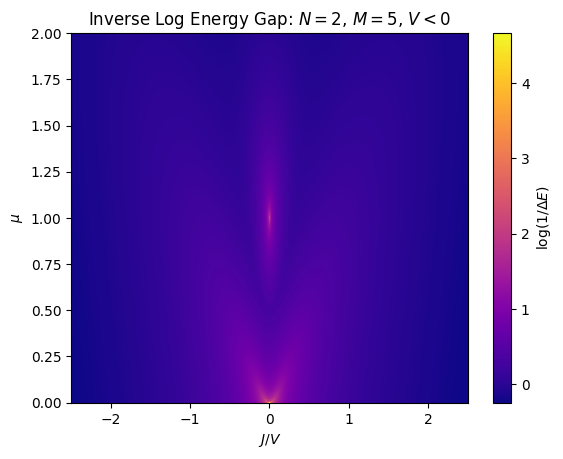

In [7]:
plt.figure()

plt.pcolormesh(J_V_ratio_grid, mu_grid, np.log10(one_over_energy_gap_grid), shading='auto', cmap='plasma')

plt.xlabel("$J/V$")
plt.ylabel("$\mu$")
if V > 0:
    plt.title(f"Inverse Log Energy Gap: $N=${N}, $M=${M}, $V>0$")
elif V < 0: 
    plt.title(f"Inverse Log Energy Gap: $N=${N}, $M=${M}, $V<0$")
plt.colorbar(label="$\log(1/\Delta E)$")

plt.show()

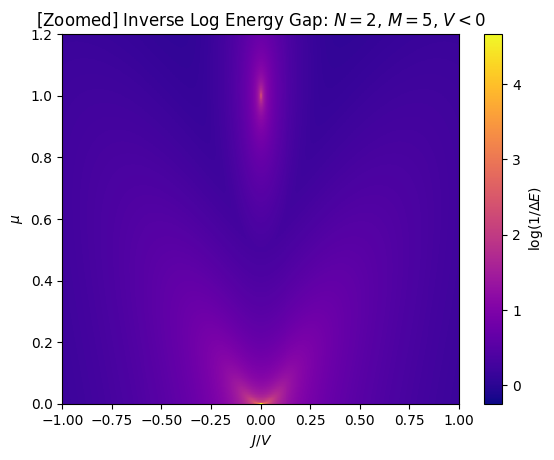

In [8]:
plt.figure()

plt.pcolormesh(J_V_ratio_grid, mu_grid, np.log10(one_over_energy_gap_grid), shading='auto', cmap='plasma')

plt.xlabel("$J/V$")
plt.ylabel("$\mu$")
if V > 0:
    plt.title(f"[Zoomed] Inverse Log Energy Gap: $N=${N}, $M=${M}, $V>0$")
elif V < 0: 
    plt.title(f"[Zoomed] Inverse Log Energy Gap: $N=${N}, $M=${M}, $V<0$")
plt.colorbar(label="$\log(1/\Delta E)$")

plt.xlim(-1,1)
plt.ylim(0,1.2)

plt.show()

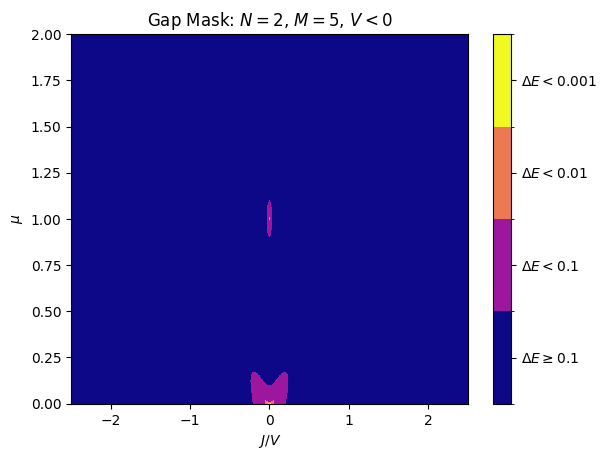

In [9]:
cmap = plt.get_cmap('plasma', 4)
bounds = [0, 1, 2, 3, 4]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.figure()
plt.pcolormesh(J_V_ratio_grid, mu_grid, energy_gap_mask, shading='auto', cmap=cmap, norm=norm)

plt.xlabel("$J/V$")
plt.ylabel("$\mu$")
if V > 0:
    plt.title(f"Gap Mask: $N=${N}, $M=${M}, $V>0$")
elif V < 0: 
    plt.title(f"Gap Mask: $N=${N}, $M=${M}, $V<0$")

cbar = plt.colorbar(ticks=[0.5, 1.5, 2.5, 3.5])
cbar.ax.set_yticklabels([f"$\Delta E \geq ${energy_gap_cutoff}", f"$\Delta E < {energy_gap_cutoff}$", f"$\Delta E < {energy_gap_cutoff_2}$", f"$\Delta E < {energy_gap_cutoff_3}$"])

plt.show()

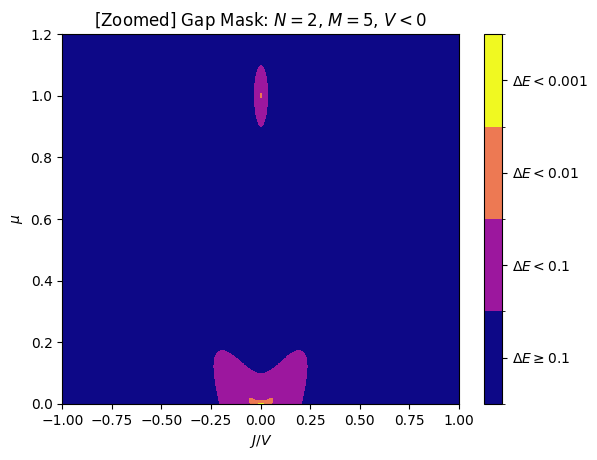

In [10]:
cmap = plt.get_cmap('plasma', 4)
bounds = [0, 1, 2, 3, 4]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.figure()
plt.pcolormesh(J_V_ratio_grid, mu_grid, energy_gap_mask, shading='auto', cmap=cmap, norm=norm)

plt.xlabel("$J/V$")
plt.ylabel("$\mu$")
if V > 0:
    plt.title(f"[Zoomed] Gap Mask: $N=${N}, $M=${M}, $V>0$")
elif V < 0: 
    plt.title(f"[Zoomed] Gap Mask: $N=${N}, $M=${M}, $V<0$")

plt.xlim(-1,1)
plt.ylim(0,1.2)

cbar = plt.colorbar(ticks=[0.5, 1.5, 2.5, 3.5])
cbar.ax.set_yticklabels([f"$\Delta E \geq ${energy_gap_cutoff}", f"$\Delta E < {energy_gap_cutoff}$", f"$\Delta E < {energy_gap_cutoff_2}$", f"$\Delta E < {energy_gap_cutoff_3}$"])

plt.show()

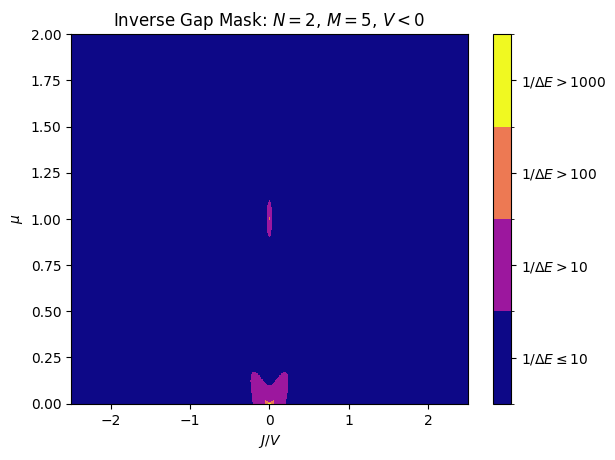

In [11]:
cmap = plt.get_cmap('plasma', 4)
bounds = [0, 1, 2, 3, 4]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.figure()
plt.pcolormesh(J_V_ratio_grid, mu_grid, energy_gap_mask, shading='auto', cmap=cmap, norm=norm)

plt.xlabel("$J/V$")
plt.ylabel("$\mu$")
if V > 0:
    plt.title(f"Inverse Gap Mask: $N=${N}, $M=${M}, $V>0$")
elif V < 0: 
    plt.title(f"Inverse Gap Mask: $N=${N}, $M=${M}, $V<0$")

cbar = plt.colorbar(ticks=[0.5, 1.5, 2.5, 3.5])
cbar.ax.set_yticklabels([f"$1/\Delta E \leq ${int(1/energy_gap_cutoff)}", f"$1/\Delta E > {int(1/energy_gap_cutoff)}$", f"$1/\Delta E > {int(1/energy_gap_cutoff_2)}$", f"$1/\Delta E > {int(1/energy_gap_cutoff_3)}$"])

plt.show()

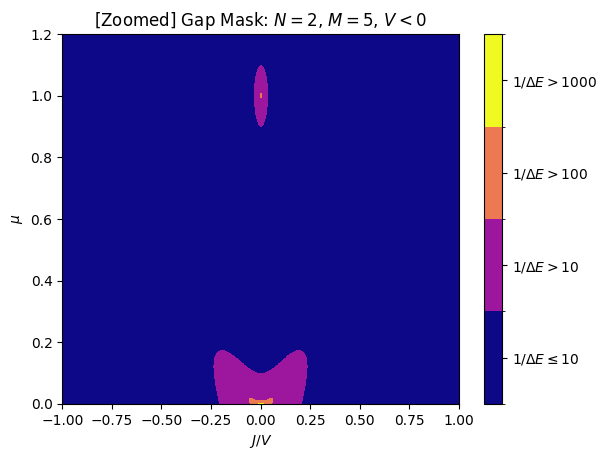

In [12]:
cmap = plt.get_cmap('plasma', 4)
bounds = [0, 1, 2, 3, 4]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.figure()
plt.pcolormesh(J_V_ratio_grid, mu_grid, energy_gap_mask, shading='auto', cmap=cmap, norm=norm)

plt.xlabel("$J/V$")
plt.ylabel("$\mu$")
if V > 0:
    plt.title(f"[Zoomed] Gap Mask: $N=${N}, $M=${M}, $V>0$")
elif V < 0: 
    plt.title(f"[Zoomed] Gap Mask: $N=${N}, $M=${M}, $V<0$")

plt.xlim(-1,1)
plt.ylim(0,1.2)

cbar = plt.colorbar(ticks=[0.5, 1.5, 2.5, 3.5])
cbar.ax.set_yticklabels([f"$1/\Delta E \leq ${int(1/energy_gap_cutoff)}", f"$1/\Delta E > {int(1/energy_gap_cutoff)}$", f"$1/\Delta E > {int(1/energy_gap_cutoff_2)}$", f"$1/\Delta E > {int(1/energy_gap_cutoff_3)}$"])

plt.show()

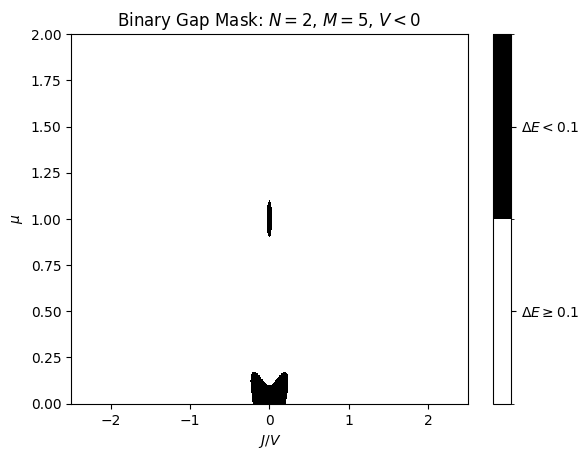

In [13]:
binary_gap_mask = (energy_gap_grid <= energy_gap_cutoff).astype(int)

cmap = plt.get_cmap('binary', 2)
bounds = [0, 0.5, 1]
norm = mcolors.BoundaryNorm(bounds, ncolors=len(bounds) - 1)

plt.figure()
plt.pcolormesh(J_V_ratio_grid, mu_grid, binary_gap_mask, shading='auto', cmap=cmap, norm=norm)

plt.xlabel("$J/V$")
plt.ylabel("$\mu$")
if V > 0:
    plt.title(f"Binary Gap Mask: $N=${N}, $M=${M}, $V>0$")
elif V < 0: 
    plt.title(f"Binary Gap Mask: $N=${N}, $M=${M}, $V<0$")

cbar = plt.colorbar(ticks=[0.25, 0.75])
cbar.ax.set_yticklabels([f"$\Delta E \geq {energy_gap_cutoff}$", f"$\Delta E < {energy_gap_cutoff}$"])

plt.show()


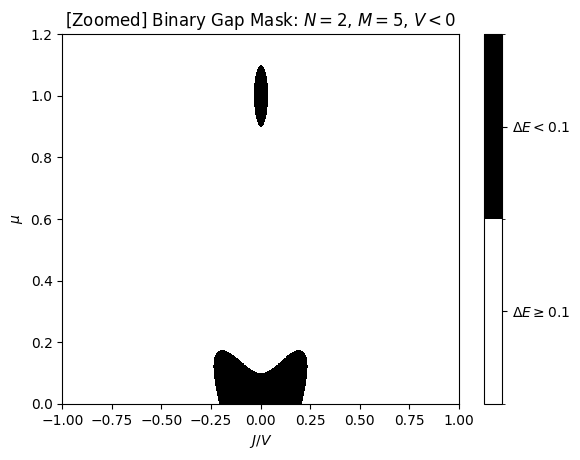

In [14]:
binary_gap_mask = (energy_gap_grid <= energy_gap_cutoff).astype(int)

cmap = plt.get_cmap('binary', 2)
bounds = [0, 0.5, 1]
norm = mcolors.BoundaryNorm(bounds, ncolors=len(bounds) - 1)

plt.figure()
plt.pcolormesh(J_V_ratio_grid, mu_grid, binary_gap_mask, shading='auto', cmap=cmap, norm=norm)

plt.xlabel("$J/V$")
plt.ylabel("$\mu$")
if V > 0:
    plt.title(f"[Zoomed] Binary Gap Mask: $N=${N}, $M=${M}, $V>0$")
elif V < 0: 
    plt.title(f"[Zoomed] Binary Gap Mask: $N=${N}, $M=${M}, $V<0$")

plt.xlim(-1, 1)
plt.ylim(0, 1.2)

cbar = plt.colorbar(ticks=[0.25, 0.75])
cbar.ax.set_yticklabels([f"$\Delta E \geq {energy_gap_cutoff}$", f"$\Delta E < {energy_gap_cutoff}$"])

plt.show()


In [15]:
def interpolate_parameters(param_initial, param_final, t_total, dt = 1, method = "linear"):
    times = np.linspace(0, t_total, int(t_total/dt))
    
    params = []
    
    for t in times:
        s = t/t_total
        
        if method == "linear":
            instantaneous_param = (1-s)*param_initial + s*param_final
        
        params.append(instantaneous_param)
            
    params = np.array(params)

    return params    

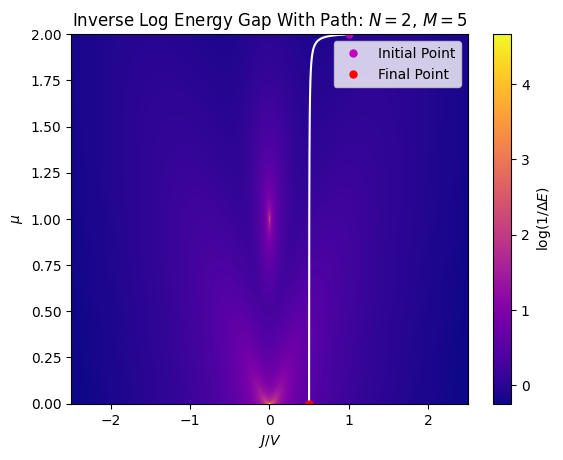

In [16]:
mu = 2

init_J = 0.01
init_V = 0.01

J = 1
V = 2

t_total = 1000

mu_array = interpolate_parameters(mu, 0, t_total) 
J_array = interpolate_parameters(init_J, J, t_total) 
V_array = interpolate_parameters(init_V, V, t_total) 

J_V_ratio_array = J_array/V_array

plt.figure()

plt.pcolormesh(J_V_ratio_grid, mu_grid, np.log10(one_over_energy_gap_grid), shading='auto', cmap='plasma')

plt.xlabel("$J/V$")
plt.ylabel("$\mu$")
plt.title(f"Inverse Log Energy Gap With Path: $N=${N}, $M=${M}")
plt.colorbar(label="$\log(1/\Delta E)$")

# Overlay the (x, y) coordinates
plt.plot(J_V_ratio_array, mu_array, color='white', linestyle='-', markersize=1)

# Mark the initial and final points with red dots
plt.plot(J_V_ratio_array[0], mu_array[0], 'mo', markersize=5, label='Initial Point')
plt.plot(J_V_ratio_array[-1], mu_array[-1], 'ro', markersize=5, label='Final Point')

plt.legend()
plt.show()